# Basin heat uptake

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd
import cosima_cookbook as cc
from collections import OrderedDict


In [ ]:
from dask.distributed import Client
client = Client(n_workers=4)
client

In [2]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_1.db')

In [3]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable = 'temp_global_ave'
darray_warm = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
darray_warm
annual_average_warm = darray_warm.groupby('time.year').mean(dim='time')
darray_swarm = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm = darray_swarm.groupby('time.year').mean(dim='time')
temp_warm = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm = temp_warm.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_warm = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')


In [4]:
expt = '1deg_jra55_ryf_RCPcont'
variable = 'temp_global_ave'
darray_cont = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cont = darray_cont.groupby('time.year').mean(dim='time')
darray_scont = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scont = darray_scont.groupby('time.year').mean(dim='time')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cont = temp_cont.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cont= cc.querying.getvar(expt,'net_sfc_heating',session,start_time='2900-01-01')#.groupby('time.year').sum(dim='time')


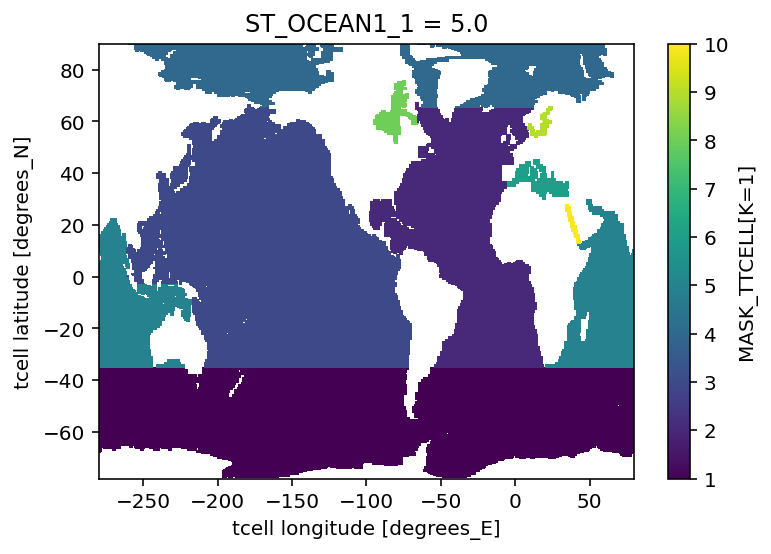

In [6]:
basinmask = xr.open_dataset('/scratch/e14/cy8964/access-om2/mask/basin_mask.nc')
basinmask.BASIN_MASK.plot()

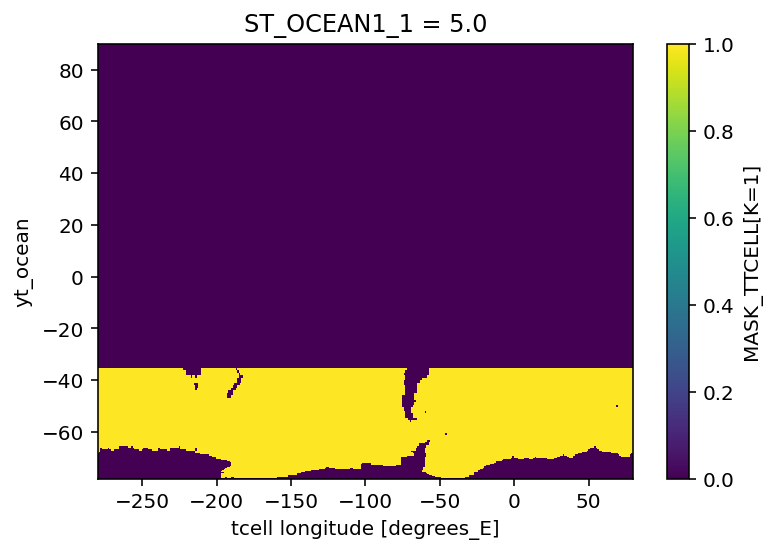

In [7]:
southern_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK < 2)).isel(ST_OCEAN1_1 = 0).fillna(0)
southern_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
southern_mask = southern_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
southern_mask.plot()

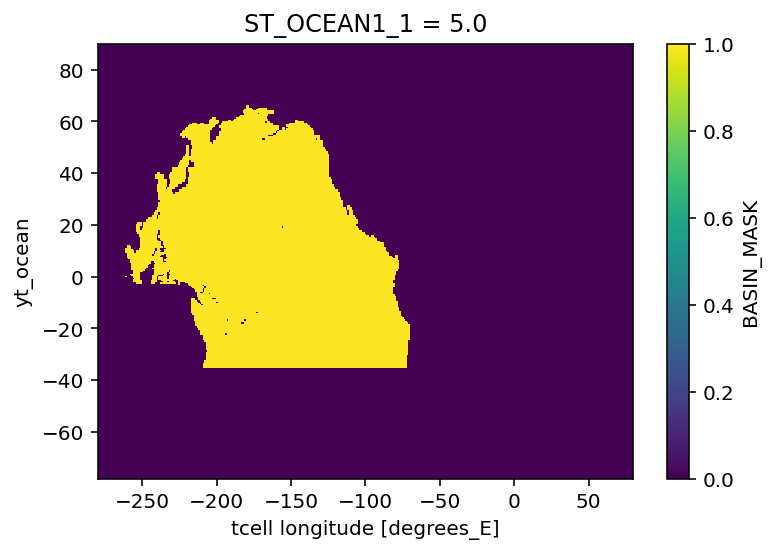

In [8]:
pacific_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 2).where(basinmask.BASIN_MASK < 4)/3).isel(ST_OCEAN1_1 = 0).fillna(0)
pacific_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
pacific_mask = pacific_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
pacific_mask.plot()

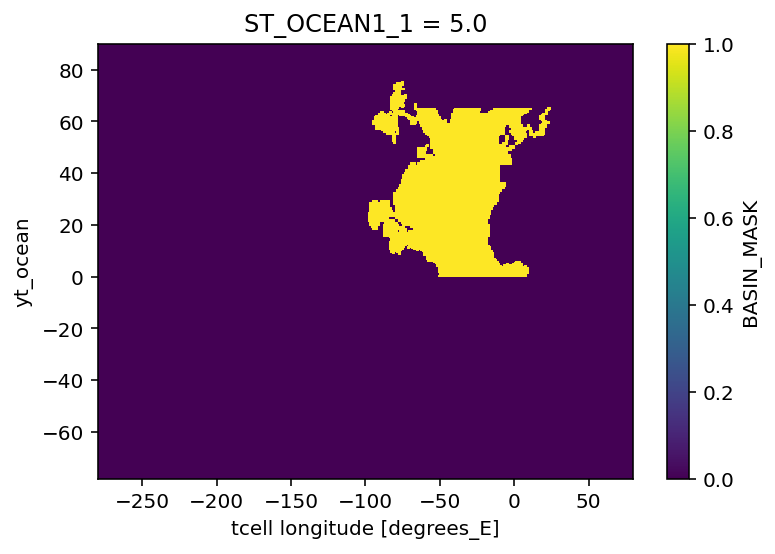

In [9]:
# north_atlantic_mask = (basinmask.BASIN_MASK.where(basinmask.YT_OCEAN > 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).fillna(0)
# north_atlantic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
# north_atlantic_mask = north_atlantic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
# north_atlantic_mask.plot()

north_atlantic_mask = (basinmask.BASIN_MASK.where(basinmask.YT_OCEAN > 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).fillna(0)
extra_mask1 = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 7).where(basinmask.BASIN_MASK < 9)/8).isel(ST_OCEAN1_1 = 0).fillna(0)
extra_mask2 = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 8).where(basinmask.BASIN_MASK < 10)/9).isel(ST_OCEAN1_1 = 0).fillna(0)

north_atlantic_mask = north_atlantic_mask+extra_mask1+extra_mask2
north_atlantic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
north_atlantic_mask = north_atlantic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
north_atlantic_mask.plot()

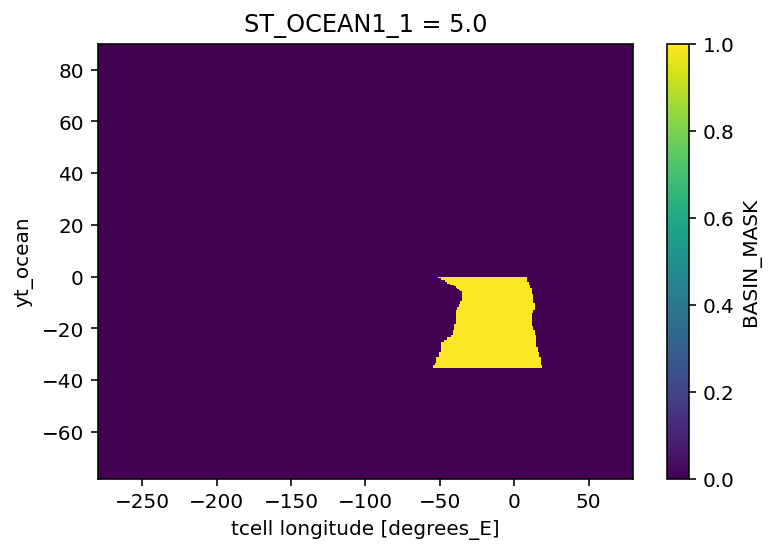

In [10]:
south_atlantic_mask = (basinmask.BASIN_MASK.where(basinmask.YT_OCEAN < 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).fillna(0)
south_atlantic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
south_atlantic_mask = south_atlantic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
south_atlantic_mask.plot()

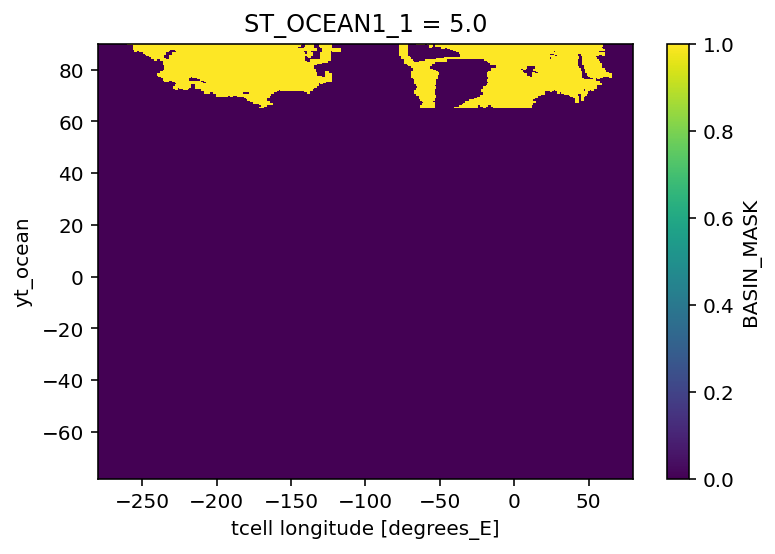

In [11]:
arctic_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 3).where(basinmask.BASIN_MASK < 5)/4).isel(ST_OCEAN1_1 = 0).fillna(0)
arctic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
arctic_mask = arctic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
arctic_mask.plot()

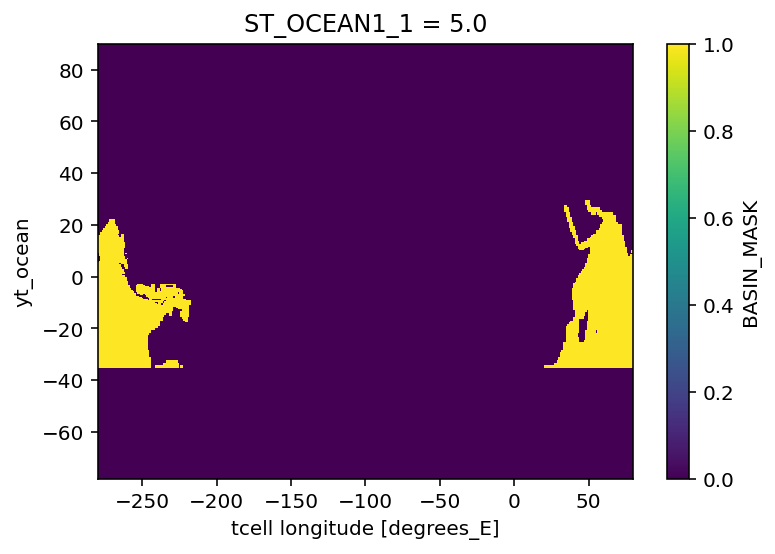

In [12]:
# indian_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 4).where(basinmask.BASIN_MASK < 6)/5).isel(ST_OCEAN1_1 = 0).fillna(0)
# indian_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
# indian_mask = indian_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
# indian_mask.plot()

indian_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 4).where(basinmask.BASIN_MASK < 6)/5).isel(ST_OCEAN1_1 = 0).fillna(0)
extra_mask3 = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 9)/10).isel(ST_OCEAN1_1 = 0).fillna(0)
indian_mask = indian_mask+extra_mask3
indian_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
indian_mask = indian_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
indian_mask.plot()

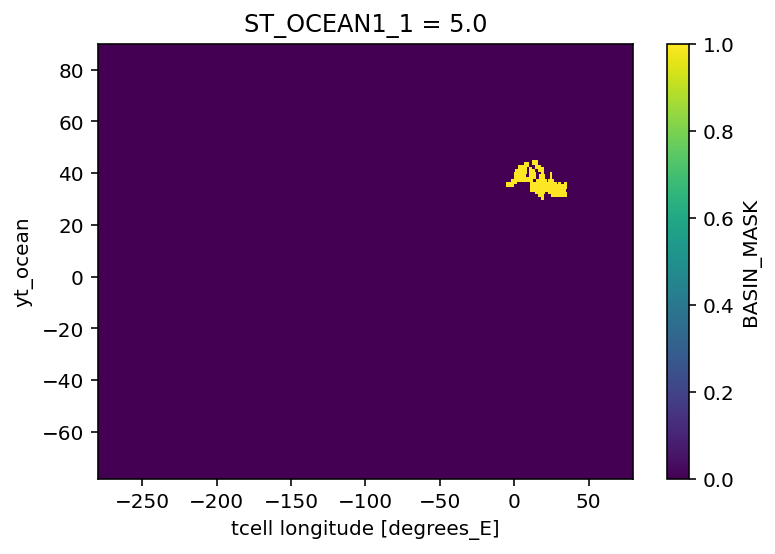

In [13]:
mediterranean_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 5).where(basinmask.BASIN_MASK < 7)/6).isel(ST_OCEAN1_1 = 0).fillna(0)
mediterranean_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
mediterranean_mask = mediterranean_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
mediterranean_mask.plot()

there are also some smaller masks e.g. baltic sea, hudson bay (canada) and red sea (middle east) which I have combined with adjacent larger masks

Note surface flux $$ Q = \frac{dq}{dt} - Z $$ where $Q$ is surface heat flux, $q$ is vertically integrated heat content, and $Z$ is horizontal flow of heat out of the region.
If we integrate surface flux over time then we get $$ \int_{t=0}^{t=50}Qdt = q(t=50)-q(t=0) - \int_{t=0}^{t=50}Zdt $$
Now we want to look at anomalies. So if we sum the surface flux anomaly over time we get the verticla heat anomaly at t=50 - vertical heat anomaly at t=0 and the difference is the total time integrated horizontal heat transport.
vertical heat anomaly at year = 0 is not zero bc average is in middle of year. but should be zero at time = 0

Heat uptake

In [15]:
rho_0 = 1030#kg/m^3
c_p = 3992 #J/kg/K


In [17]:
expt = '1deg_jra55_ryf_RCPcont'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_cont = (rho_0*c_p*darray1*darray2).sum('st_ocean')


In [18]:
expt = '1deg_jra55_ryf_RCPcont'
net_sfc_heating_cont = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
frazil_cont = cc.querying.getvar(expt,'frazil_3d_int_z',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))

surface_heat_flux_cont = net_sfc_heating_cont+frazil_cont 

In [19]:
def heat_cont(ekey,basin_mask, year):
    rho_0 = 1030#kg/m^3
    c_p = 3992 
    expt = exptdict[ekey]['expt']
    variable1 = 'temp'
    darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
    variable2 = 'dzt'
    darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
    variable3 = 'area_t'
    darray3 = cc.querying.getvar(expt, variable3, session,n=1)
    vertically_integrated_heat_warm = (rho_0*c_p*darray1*darray2).sum('st_ocean')
    
    basin_heat_content = ((vertically_integrated_heat_warm-vertically_integrated_heat_cont)*basin_mask*darray3).groupby('time.year').mean('time').isel(year = year).sum('xt_ocean').sum('yt_ocean').values
    net_sfc_heating = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    frazil = cc.querying.getvar(expt,'frazil_3d_int_z',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    surface_heat_flux = net_sfc_heating+frazil
    month_length = surface_heat_flux.time.dt.days_in_month

    basin_surface_int = (((surface_heat_flux-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    return basin_heat_content, basin_surface_int

In [20]:
exptdict = OrderedDict([
    ('Control',  {'expt':'1deg_jra55_ryf_RCPcont'}),
    ('Warming',  {'expt':'1deg_jra55_ryf_RCPwarmhumid'}),
    ('Warming x2',  {'expt':'1deg_jra55_ryf_RCPwarmhumid2x'}),
    ('Cooling',  {'expt':'1deg_jra55_ryf_RCPcoolhumid'}),
    ('Cooling x2',  {'expt':'1deg_jra55_ryf_RCPcoolhumid2x'}),
    ('Warming w/o humidity',  {'expt':'1deg_jra55_ryf_rcpwarm'}),
    ('Cooling w/o humidity',  {'expt':'1deg_jra55_ryf_rcpcool'}),
    ('Cooling w/o humidity2', {'expt':'1deg_jra55_ryf_RCPcool'}),
    ('Windup', {'expt':'1deg_jra55_ryf_red3DSK_C9'})

])

In [37]:
basin_heat_content, basin_surface_int = heat_cont('Warming', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

#basin_heat_content, basin_surface_int = heat_cont('Warming', extra_mask, 49)
#extra = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])



In [38]:
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))

In [39]:
indopacificsum = np.sum(data[2][0:2])

In [40]:
atlanticsum = np.sum(data[2][3:])

(-4e+23, 6e+23)

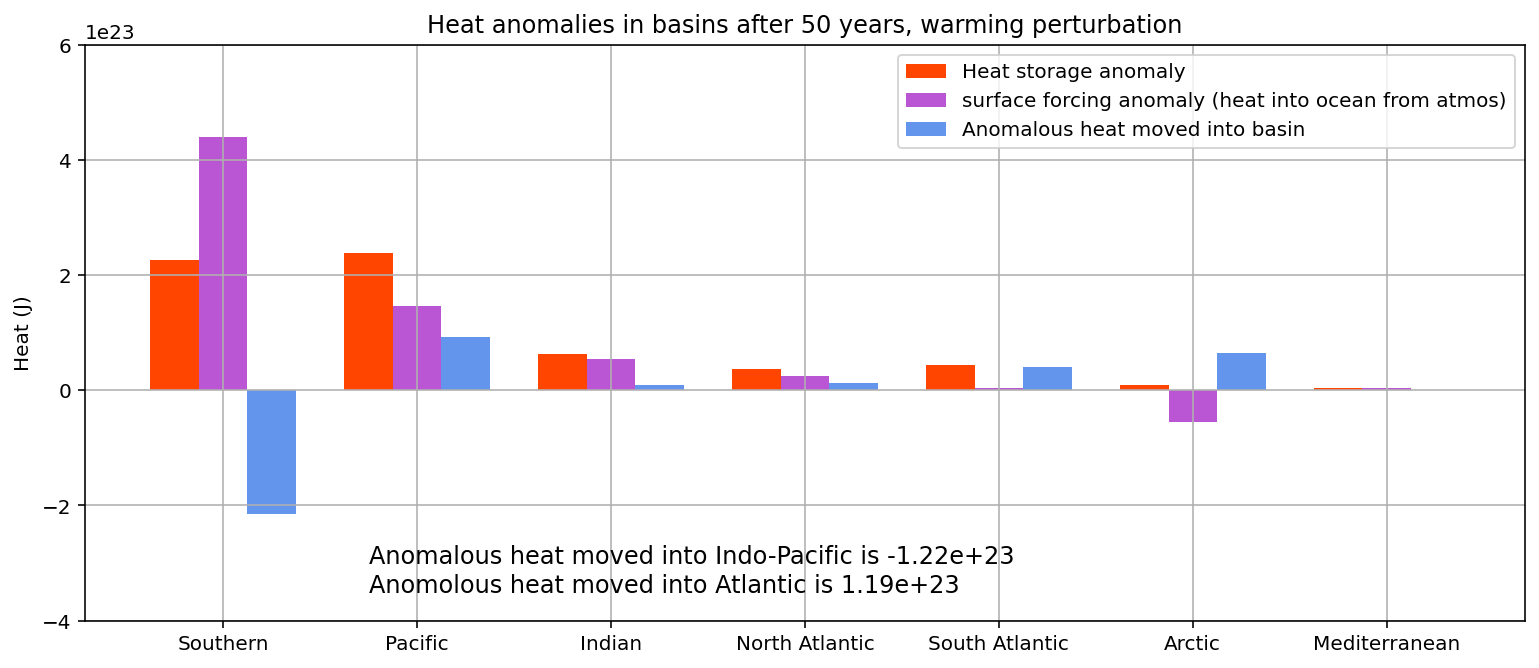

In [34]:
X = np.arange(7)
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat storage anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X+0.25, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, warming perturbation')
plt.text(1,-3e23,'Anomalous heat moved into Indo-Pacific is %s' % float('%.3g' % indopacificsum), fontsize = 12)
plt.text(1,-3.5e23,'Anomolous heat moved into Atlantic is %s' % float('%.3g' % atlanticsum), fontsize = 12)
plt.ylabel('Heat (J)')
plt.grid()
plt.ylim(-4e23,6e23)
#plt.savefig('figures/warmbasin', bbox_inches='tight')

(-6e+23, 4e+23)

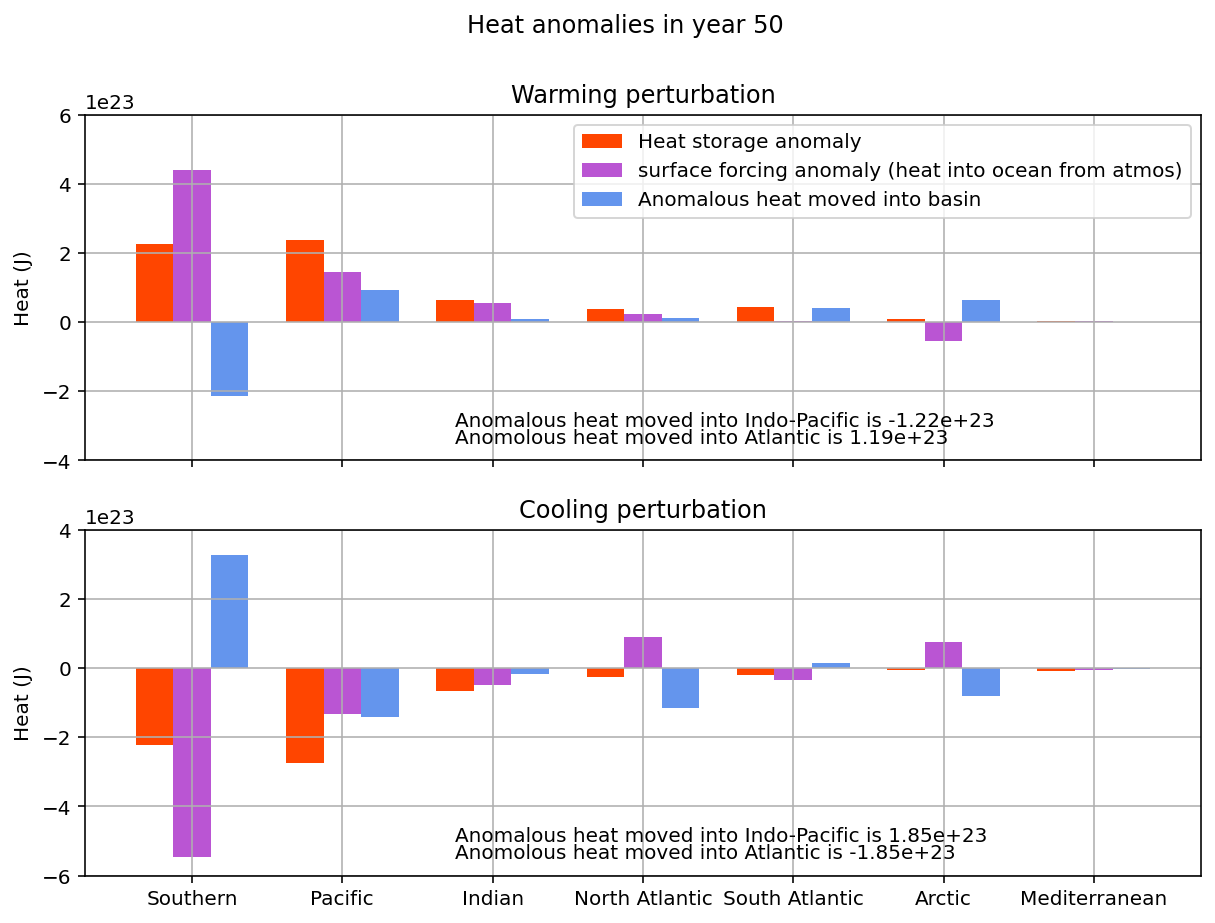

In [41]:
X = np.arange(7)

fig, axes = plt.subplots(ncols=1, nrows=2, figsize = (10,7), sharex = True)
plt.suptitle('Heat anomalies in year 50')
axes[0].bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
axes[0].bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
axes[0].bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
axes[0].legend(labels=['Heat storage anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
axes[0].set_xticks(X+0.25)
axes[0].set_xticklabels(('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
axes[0].set_title('Warming perturbation')
axes[0].text(2,-3e23,'Anomalous heat moved into Indo-Pacific is %s' % float('%.3g' % indopacificsum), fontsize = 10)
axes[0].text(2,-3.5e23,'Anomolous heat moved into Atlantic is %s' % float('%.3g' % atlanticsum), fontsize = 10)
axes[0].set_ylabel('Heat (J)')
axes[0].grid(True)
axes[0].set_ylim(-4e23,6e23)

basin_heat_content, basin_surface_int = heat_cont('Cooling', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
indopacificsum = np.sum(data[2][0:2])
atlanticsum = np.sum(data[2][3:])
axes[1].bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
axes[1].bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
axes[1].bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
#axes[1].legend(labels=['Heat storage anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
axes[1].set_xticks(X+0.25)
axes[1].set_xticklabels(('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))

axes[1].set_title('Cooling perturbation')
axes[1].text(2,-5e23,'Anomalous heat moved into Indo-Pacific is %s' % float('%.3g' % indopacificsum), fontsize = 10)
axes[1].text(2,-5.5e23,'Anomolous heat moved into Atlantic is %s' % float('%.3g' % atlanticsum), fontsize = 10)
axes[1].set_ylabel('Heat (J)')
axes[1].grid(True)
axes[1].set_ylim(-6e23,4e23)

In [22]:
expt = '1deg_jra55_ryf_RCPcont'

sw_cont = cc.querying.getvar(expt, 'swflx', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
lw_cont = cc.querying.getvar(expt, 'lw_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
sens_cont = cc.querying.getvar(expt, 'sens_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
evap_cont = cc.querying.getvar(expt, 'evap_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
pme_cont = cc.querying.getvar(expt,'sfc_hflux_pme',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
runoff_cont = cc.querying.getvar(expt,'sfc_hflux_from_runoff',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
frazil_cont = cc.querying.getvar(expt,'frazil_3d_int_z',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
net_sfc_cont = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
surface_heat_flux_cont =  frazil_cont + net_sfc_cont
iceseaexchange_cont = surface_heat_flux_cont-sw_cont-lw_cont-sens_cont-evap_cont-pme_cont-runoff_cont


In [23]:
def decompose_surface_flux(ekey,basin_mask, year):
    expt = exptdict[ekey]['expt']

    darray3 = cc.querying.getvar(expt, 'area_t', session,n=1)

    sw = cc.querying.getvar(expt, 'swflx', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    lw = cc.querying.getvar(expt, 'lw_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    sens = cc.querying.getvar(expt, 'sens_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    evap = cc.querying.getvar(expt, 'evap_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    frazil = cc.querying.getvar(expt,'frazil_3d_int_z',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    net_sfc = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    surface_heat_flux =  frazil + net_sfc
    month_length = surface_heat_flux.time.dt.days_in_month
    pme = cc.querying.getvar(expt,'sfc_hflux_pme',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    runoff = cc.querying.getvar(expt,'sfc_hflux_from_runoff',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    iceseaexchange = surface_heat_flux-sw-lw-sens-evap-pme-runoff

    basin_sw_int = (((sw-sw_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_lw_int = (((lw-lw_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_sens_int = (((sens-sens_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_evap_int = (((evap-evap_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_icesea_int = (((iceseaexchange-iceseaexchange_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_pme_int = (((pme-pme_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_runoff_int = (((runoff-runoff_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_frazil_int = (((frazil-frazil_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    
    basin_surface_int = (((surface_heat_flux-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    return np.array([basin_sw_int, basin_lw_int, basin_sens_int, basin_evap_int, basin_surface_int, basin_pme_int, basin_runoff_int, basin_icesea_int, basin_frazil_int])

In [24]:
def decompose_surface_flux_cont(basin_mask, year):
    expt = '1deg_jra55_ryf_RCPcont'

    darray3 = cc.querying.getvar(expt, 'area_t', session,n=1)
    surface_heat_flux = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    # frazil_3d_int_z
    month_length = surface_heat_flux.time.dt.days_in_month

    basin_sw_int = (((sw_cont)).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).mean('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_lw_int = (((lw_cont)).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).mean('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_sens_int = (((sens_cont)).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).mean('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_evap_int = (((evap_cont)).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).mean('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_icesea_int = (((iceseaexchange_cont)).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).mean('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_pme_int = (((pme_cont)).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).mean('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_runoff_int = (((runoff_cont)).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).mean('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_frazil_int = (((frazil_cont)).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).mean('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values

    
    basin_surface_int = (((surface_heat_flux_cont)).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).mean('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    return np.array([basin_sw_int, basin_lw_int, basin_sens_int, basin_evap_int, basin_surface_int, basin_pme_int, basin_runoff_int, basin_icesea_int, basin_frazil_int])

In [49]:
southern = decompose_surface_flux('Warming', southern_mask, 59)
pacific = decompose_surface_flux('Warming', pacific_mask, 59)
indian = decompose_surface_flux('Warming', indian_mask, 59)
north_atlantic = decompose_surface_flux('Warming', north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux('Warming', south_atlantic_mask, 59)
arctic = decompose_surface_flux('Warming', arctic_mask, 59)
mediterranean = decompose_surface_flux('Warming', mediterranean_mask, 59)


In [50]:
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))

[ 3.28142974e+23  1.63952825e+23  8.88345667e+23 -7.92636603e+23
  6.40208331e+23 -9.57382839e+20  3.49539987e+21  4.98654503e+22
 -6.34529041e+21]


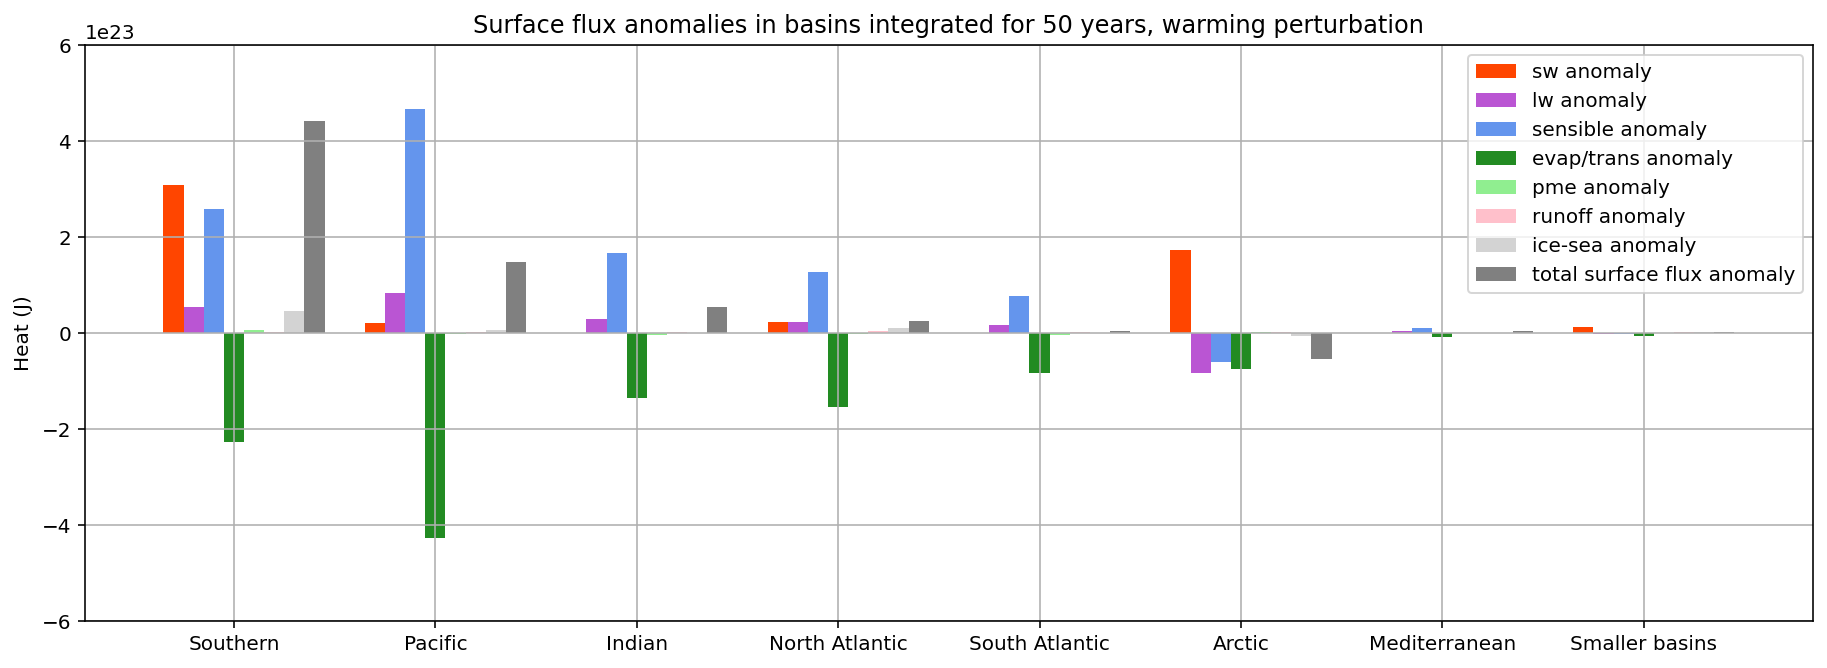

In [53]:
X = np.arange(7)
fig = plt.figure(figsize = (12,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.1)
ax.bar(X + 0.1, data[1], color = 'mediumorchid', width = 0.1)
ax.bar(X + 0.2, data[2], color = 'cornflowerblue', width = 0.1)
ax.bar(X + 0.3, data[3], color = 'forestgreen', width = 0.1)
ax.bar(X + 0.4, data[5], color = 'lightgreen', width = 0.1)
ax.bar(X + 0.5, data[6], color = 'pink', width = 0.1)
ax.bar(X + 0.6, data[7], color = 'lightgrey', width = 0.1)
ax.bar(X + 0.7, data[4], color = 'grey', width = 0.1)

ax.legend(labels=['sw anomaly', 'lw anomaly','sensible anomaly', 'evap/trans anomaly','pme anomaly','runoff anomaly','ice-sea anomaly','total surface flux anomaly'])
plt.xticks(X+0.3, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Surface flux anomalies in basins integrated for 50 years, warming perturbation')
plt.grid()
plt.ylim(-6e23,6e23)
plt.ylabel('Heat (J)')

print(np.sum(data[:,0:3], axis = 1))
#plt.savefig('warming_surfbasin')

Frazil looks tiny, as do pme and runoff so we can ignore these in other plots.

[ 3.28142974e+23  1.63952825e+23  8.88345667e+23 -7.92636603e+23
  6.40208331e+23 -9.57382839e+20  3.49539987e+21  4.98654503e+22
 -6.34529041e+21]


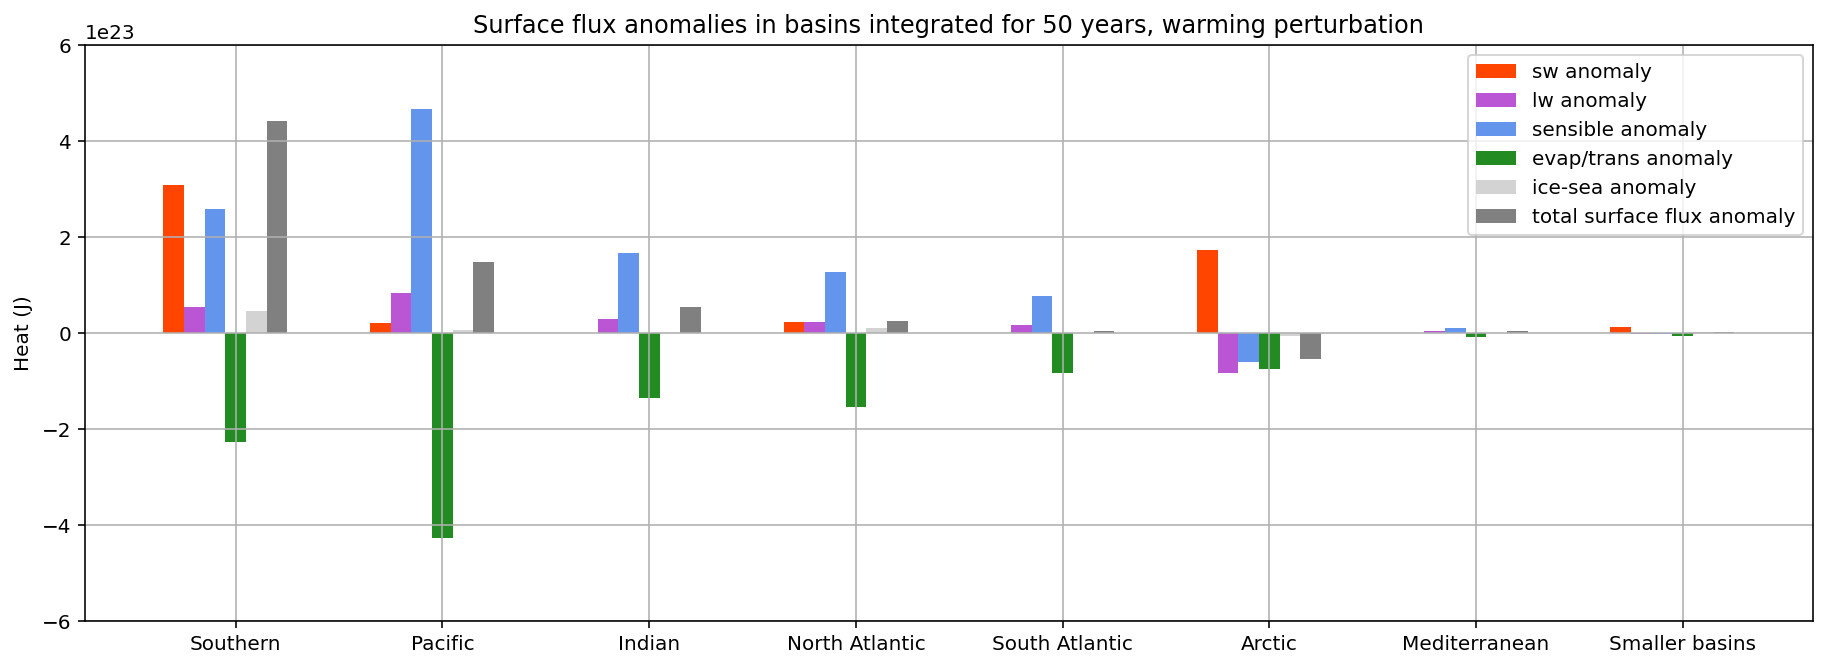

In [54]:
X = np.arange(8)
fig = plt.figure(figsize = (12,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.1)
ax.bar(X + 0.1, data[1], color = 'mediumorchid', width = 0.1)
ax.bar(X + 0.2, data[2], color = 'cornflowerblue', width = 0.1)
ax.bar(X + 0.3, data[3], color = 'forestgreen', width = 0.1)
ax.bar(X + 0.4, data[7], color = 'lightgrey', width = 0.1)
ax.bar(X + 0.5, data[4], color = 'grey', width = 0.1)

ax.legend(labels=['sw anomaly', 'lw anomaly','sensible anomaly', 'evap/trans anomaly','ice-sea anomaly','total surface flux anomaly'])
plt.xticks(X+0.3, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean', 'Smaller basins'))
plt.title('Surface flux anomalies in basins integrated for 50 years, warming perturbation')
plt.grid()
plt.ylim(-6e23,6e23)
plt.ylabel('Heat (J)')

print(np.sum(data[:,0:3], axis = 1))
#plt.savefig('warming_surfbasin')

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Text(0, 0.5, 'Watts (W)')

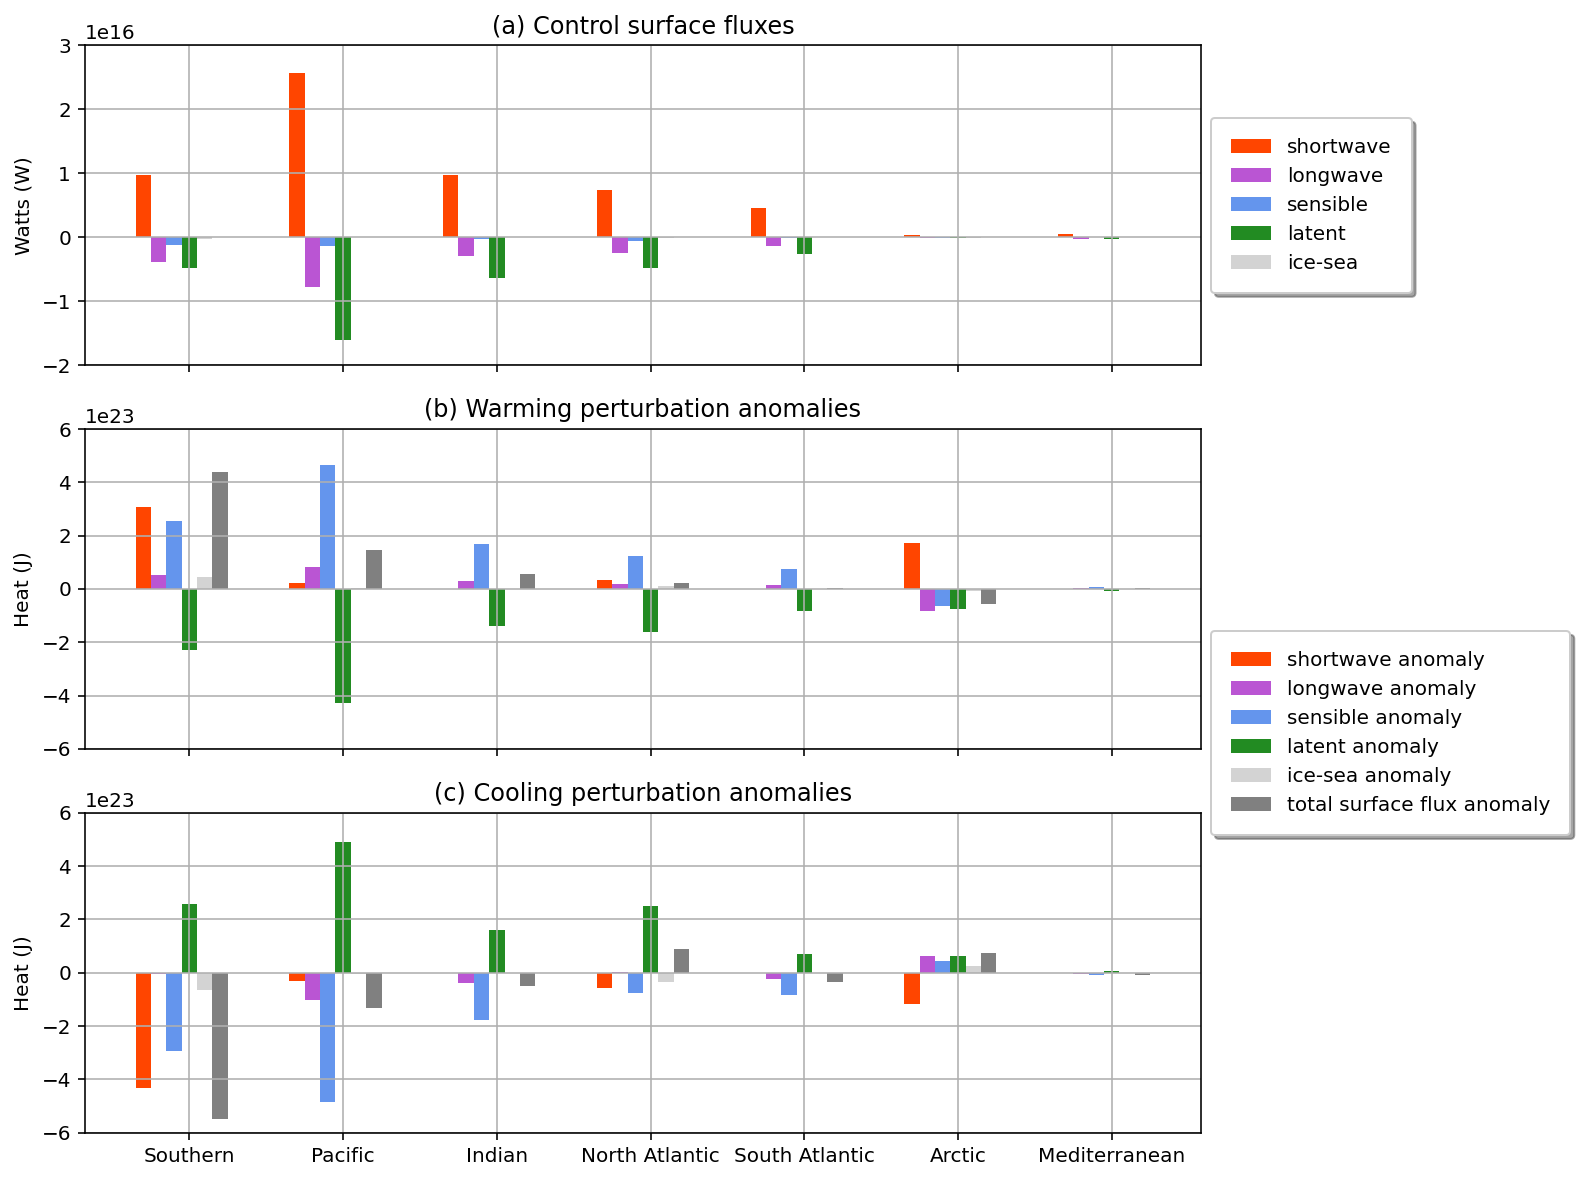

In [48]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize = (10,10), sharex = True)

axes[2].set_xticklabels(('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))

southern = decompose_surface_flux('Warming', southern_mask, 59)
pacific = decompose_surface_flux('Warming', pacific_mask, 59)
indian = decompose_surface_flux('Warming', indian_mask, 59)
north_atlantic = decompose_surface_flux('Warming', north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux('Warming', south_atlantic_mask, 59)
arctic = decompose_surface_flux('Warming', arctic_mask, 59)
mediterranean = decompose_surface_flux('Warming', mediterranean_mask, 59)
#extra = decompose_surface_flux('Warming', extra_mask, 59)
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
X = np.arange(7)
axes[1].bar(X + 0.00, data[0], color = 'orangered', width = 0.1)
axes[1].bar(X + 0.1, data[1], color = 'mediumorchid', width = 0.1)
axes[1].bar(X + 0.2, data[2], color = 'cornflowerblue', width = 0.1)
axes[1].bar(X + 0.3, data[3], color = 'forestgreen', width = 0.1)
axes[1].bar(X + 0.4, data[7], color = 'lightgrey', width = 0.1)
axes[1].bar(X + 0.5, data[4], color = 'grey', width = 0.1)

#axes[1].legend(labels=['shortwave anomaly', 'longwave anomaly','sensible anomaly', 'evap/trans anomaly','ice-sea anomaly','total surface flux anomaly'])
axes[1].set_xticks(X+0.3)
axes[1].set_title('(b) Warming perturbation anomalies')
axes[1].grid(True)
axes[1].set_ylim(-6e23,6e23)
axes[1].set_ylabel('Heat (J)')

southern = decompose_surface_flux('Cooling', southern_mask, 59)
pacific = decompose_surface_flux('Cooling', pacific_mask, 59)
indian = decompose_surface_flux('Cooling', indian_mask, 59)
north_atlantic = decompose_surface_flux('Cooling', north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux('Cooling', south_atlantic_mask, 59)
arctic = decompose_surface_flux('Cooling', arctic_mask, 59)
mediterranean = decompose_surface_flux('Cooling', mediterranean_mask, 59)
#extra = decompose_surface_flux('Cooling', extra_mask, 59)
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
axes[2].bar(X + 0.00, data[0], color = 'orangered', width = 0.1)
axes[2].bar(X + 0.1, data[1], color = 'mediumorchid', width = 0.1)
axes[2].bar(X + 0.2, data[2], color = 'cornflowerblue', width = 0.1)
axes[2].bar(X + 0.3, data[3], color = 'forestgreen', width = 0.1)
axes[2].bar(X + 0.4, data[7], color = 'lightgrey', width = 0.1)
axes[2].bar(X + 0.5, data[4], color = 'grey', width = 0.1)

axes[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(1, 1.25),loc = 'center left',labels=['shortwave anomaly', 'longwave anomaly','sensible anomaly', 'latent anomaly','ice-sea anomaly','total surface flux anomaly'])
axes[2].set_xticks(X+0.3)
axes[2].set_title('(c) Cooling perturbation anomalies')
axes[2].grid(True)
axes[2].set_ylim(-6e23,6e23)
axes[2].set_ylabel('Heat (J)')

southern = decompose_surface_flux_cont( southern_mask, 59)
pacific = decompose_surface_flux_cont( pacific_mask, 59)
indian = decompose_surface_flux_cont(indian_mask, 59)
north_atlantic = decompose_surface_flux_cont( north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux_cont(south_atlantic_mask, 59)
arctic = decompose_surface_flux_cont(arctic_mask, 59)
mediterranean = decompose_surface_flux_cont( mediterranean_mask, 59)
#extra = decompose_surface_flux_cont( extra_mask, 59)
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
X = np.arange(7)

axes[0].bar(X + 0.00, data[0], color = 'orangered', width = 0.1)
axes[0].bar(X + 0.1, data[1], color = 'mediumorchid', width = 0.1)
axes[0].bar(X + 0.2, data[2], color = 'cornflowerblue', width = 0.1)
axes[0].bar(X + 0.3, data[3], color = 'forestgreen', width = 0.1)
axes[0].bar(X + 0.4, data[7], color = 'lightgrey', width = 0.1)
#axes[0].bar(X + 0.5, data[4], color = 'grey', width = 0.1)

axes[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(1, 0.5),loc = 'center left',labels=['shortwave', 'longwave','sensible', 'latent','ice-sea'])
axes[0].set_xticks(X+0.3)
axes[0].set_title('(a) Control surface fluxes')
axes[0].grid(True)
axes[0].set_ylim(-2e16,3e16)
axes[0].set_ylabel('Watts (W)')
